In [ ]:
import spacy

# introduction NLP

## regular expressions

In [2]:
import re

In [3]:
re.match('abc','abdef')

In [ ]:
word_regex = '\w+'
re.match(word_regex, 'hi word!')

In [ ]:
'''
\w+ word; \d digit; \s space; .* wildcard; + or * greedy match;
\S not space; [a-z] lowercase group

re module
split/ findall/ search/ match

| or; (a-z) group; [a-z] explicit character ranges

In [11]:
match = ('(\d+|\w+)')
re.findall(match, ' He has 11 cats!!')

['He', 'has', '11', 'cats']

## tokenization

In [4]:
from nltk.tokenize import word_tokenize

In [9]:
word_tokenize('Hi there!')

['Hi', 'there', '!']

In [ ]:
sent_tokenize: #tokenize a document into sentences
regexp_tokenize: #tokenize a string or document based on a regular expression pattern
TweetTokenizer: #speical class just for tweet tokenization
    #allowing you to separate hashtags, mentions and lots of exclamation points

In [12]:
from matplotlib import pyplot as plt

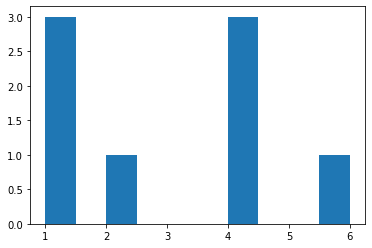

In [14]:
words = word_tokenize('this is a pretty cool tool!!')
word_lengths = [len(w) for w in words]
plt.hist(word_lengths)
plt.show()

## bag of words

In [15]:
from collections import Counter

In [19]:
counter = Counter(word_tokenize("""The cat is in the box. The cat likes the box.
The box is over the cat."""))

In [21]:
counter

Counter({'The': 3,
         'cat': 3,
         'is': 2,
         'in': 1,
         'the': 3,
         'box': 3,
         '.': 3,
         'likes': 1,
         'over': 1})

In [20]:
counter.most_common(2)

[('The', 3), ('cat', 3)]

## preprocess

In [ ]:
#tokenization to create a bag of words
#lowercasing words
#lemmatization/stemming shorten words to their root stems
#removing stop words, punctuation or unwanted tokens
#good to experiment with different approaches

In [22]:
from nltk.corpus import stopwords

In [25]:
text = """The cat is in the box. The cat likes the box.
The box is over the cat."""
tokens = [w for w in word_tokenize(text.lower()) if w.isalpha()]
no_stops = [t for t in tokens if t not in stopwords.words('english')]
Counter(no_stops).most_common(2)

[('cat', 3), ('box', 3)]

## gensim

In [ ]:
#building document or word vectors
#preforming topic identification and document comparison

In [ ]:
from gensim.corpora.dictionary import Dictionary

In [ ]:
my_documents = ['The movie was about a spaceship and aliens.',
               'I really liked the movie!',
                'Awesome action senes, but boring characers.']

In [ ]:
tokenized_docs = [word_tokenize(doc.lower()) for doc in my_documents]
dictionary = Dictionary(tokenized_docs)
dictionary.token2id

In [ ]:
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

In [ ]:
## tf-idf

In [ ]:
from gensim.models.tfidfmodel import TfidModel

In [ ]:
tfidf = TfidModel(corpus)
tfidf[corpus[1]]

## named entity recognition

In [29]:
import nltk

In [34]:
sentence = '''In New York, I like to ride the Metro to visit MOMA and
some restaurants rated well by Ruth Reichl.'''
tokenized_sent = nltk.word_tokenize(sentence)
tagged_sent = nltk.pos_tag(tokenized_sent)
tagged_sent[:3]

[('In', 'IN'), ('New', 'NNP'), ('York', 'NNP')]

In [40]:
print(nltk.ne_chunk(tagged_sent))

(S
  In/IN
  (GPE New/NNP York/NNP)
  ,/,
  I/PRP
  like/VBP
  to/TO
  ride/VB
  the/DT
  (ORGANIZATION Metro/NNP)
  to/TO
  visit/VB
  (ORGANIZATION MOMA/NNP)
  and/CC
  some/DT
  restaurants/NNS
  rated/VBN
  well/RB
  by/IN
  (PERSON Ruth/NNP Reichl/NNP)
  ./.)


In [ ]:
# Tokenize the article into sentences: sentences
sentences = nltk.sent_tokenize(article)

# Tokenize each sentence into words: token_sentences
token_sentences = [nltk.word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)

## SpaCy

In [ ]:
# facus on creating NLP pipelines to generate models and corpora

In [2]:
import spacy

In [ ]:
nlp = spacy.load('en')
nlp.entity
doc = nlp("""xxxxxx""")
doc.ents  #print entity
print(doc.ents[0], doc.ents[0].label_)

## polyglot

In [ ]:
# vectors for many different languages

In [ ]:
from polyglot.text import Text

In [ ]:
text = '''这是一句话'''
ptext = Text(text)
ptext.entities

## Building a "fake news" classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#CountVectorizer

df = ... #load data into DataFrame
y = df['Sci-Fi']
x_train, X_test, y_train, y_test = train_test_split(df['plot'], y,
                                                   test_size = 0.33,
                                                   random_state=53)

count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)

In [ ]:
#TfidfVectorizer

# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train.values)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test.values)

# Print the first 10 features
print(tfidf_vectorizer.get_feature_names()[:10])

# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A[:5])

In [ ]:
#### Naive Bayes classifier
#basis in probabiliy

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
nb_classifier = MultinomialNB()

nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)
metrics.accuracy_score(y_test, pred)
metrics.confusion_matrix(y_test,pred, labels=[0,1])